In [1]:
!python -m venv venv

In [2]:
!source venv/bin/activate

In [3]:
!pwd

/home/ec2-user/SageMaker/sagemaker/Model-Hallucination


In [4]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [5]:
# !pip install -U pip setuptools wheel
!pip install -U spacy # !pip install spacy
!python -m spacy download en_core_web_sm

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
/home/ec2-user/anaconda3/envs/pytorch_p39/lib/python3.9/site-packages/torch/cuda/__init__.py:546: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 92.7 MB/s eta 0:00:0000:0100:01


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [6]:
import re, string, unicodedata
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt                                        
import seaborn as sns                                                  
from collections import Counter                                           
from nltk.tokenize.toktok import ToktokTokenizer
import spacy
# import contractions
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator         
import nltk                                                            
import matplotlib.pylab as plt 
from nltk.corpus import wordnet
import warnings                                                           
warnings.filterwarnings("ignore")
from nltk.stem.porter import PorterStemmer  
from bs4 import BeautifulSoup
from spacy import displacy
from sklearn.feature_extraction.text import CountVectorizer

/home/ec2-user/anaconda3/envs/pytorch_p39/lib/python3.9/site-packages/torch/cuda/__init__.py:546: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [7]:
#  !pip install wordcloud

In [8]:
!pip install transformers[torch]

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [9]:
# !conda install pytorch-cpu torchvision-cpu -c pytorch

In [10]:
# !conda uninstall pytorch

In [11]:
!python -m pip install textblob

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [12]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [13]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack

from transformers import pipeline
from transformers import AutoModelWithLMHead, AutoTokenizer, AutoModelForSeq2SeqLM
import torch
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import numpy as np
import pandas as pd
model_name = "yjernite/bart_eli5"
sa=SentimentIntensityAnalyzer()

In [14]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer
# tokenizer = AutoTokenizer.from_pretrained(model_name)
# model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [16]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [17]:
from nltk.tokenize.treebank import TreebankWordTokenizer
from nltk.tokenize import WordPunctTokenizer
import emoji
from nltk.stem import WordNetLemmatizer

In [18]:
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# imported sklearn mertrics for classification report and error calculation

In [19]:
pd.set_option('display.max_colwidth', None) #to display all data of a dataframe column without truncation

import warnings #import warning module
warnings.filterwarnings('ignore') #set to ignore any warning 
from IPython.core.display import HTML #import HTML module
HTML("<style>.container { width:95% !important; }</style>") #set HTML style to get more space in notebook

In [20]:
# Baseline Business Rule
def Customer_Service_Business_Rule(tweet_str, idx):
    print("Customer Tweet: ", tweet_str)
    if idx == 0:
        return ("Bot (Negative Sentiment): I'm sorry you feel this way")
    elif idx ==1:
        return ("Bot:(Neutral Sentiment)  --no response--")
    elif idx ==2:
        return ("Bot: Glad, you are happy with our service")

In [21]:
def Customer_Service_Business_Rule_Transformer(tweet_str, idx):
    print("Tweet Summarization: ", tweet_str)
    if idx == 0:
        return ("Bot (Negative Sentiment): I'm sorry you feel this way")
    elif idx ==1:
        return ("Bot:(Neutral Sentiment)  --no response--")
    elif idx ==2:
        return ("Bot: Glad, you are happy with our service")

In [22]:
# Economic Baseline Business Rule for CSR
def Language_Used(tweet_str, idx):
    print("Customer Tweet: ", tweet_str)
    if idx == 0:
        return ("negative")
    elif idx ==1:
        return ("polite") 
    elif idx ==2:
        return ("positive")

In [23]:
import os
import pandas as pd
try:
#     metricset = pd.read_excel('data\\transformer_metrics.xlsx')
#     metricset = pd.read_csv('data\\tweets.csv')
    metricset = pd.read_excel('tweets_100.xlsx')

except:
    print("Error Loading file(s),  current working directory:", format(os.getcwd()))

In [24]:
metricset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  100 non-null    object
 1   text       100 non-null    object
 2   BERT       100 non-null    object
 3   ELECTRA    100 non-null    object
dtypes: object(4)
memory usage: 3.2+ KB


In [25]:
print (metricset.dtypes)

sentiment    object
text         object
BERT         object
ELECTRA      object
dtype: object


In [26]:
# metricset['text'] = metricset['text'].astype(str)
# metricset = metricset.applymap(str)

#### Randomize the model choice, Double blind the business rule function - hypothesis wins if generations still shows trend of polarization

In [27]:
metricset.head()

,sentiment,text,BERT,ELECTRA
0,negative,@united On top of that I paid for 1st class and my wife got stuck in coach.,negative,negative
1,negative,@united Ph the pat answers are BS. After I was denied boarding it sat at the gate until 9:05! Your employees totally suck.,negative,negative
2,negative,"@United Over the last week, United has provided me with the worst customer service experience of my life. Disgusting. #united",negative,positive
3,negative,@united 24 hrs since flight landed and ZERO info on my missing bag? rough ETA would be hugely helpful + restore some confidence,negative,negative
4,negative,@united big surprise #nogate waiting for our plane. Same fucken issues everything I fly you. #fail #worstairlineever,negative,negative


In [28]:
def Vader(text):
#     print(text)
    score = sa.polarity_scores(text)
    idx = np.argmax([score.get('neg'),score.get('neu'),score.get('pos')],0)
    if idx == 0:
        return 'negative'
    elif idx == 1:
        return 'neutral'
    elif idx == 2:
        return 'positive'

### Model 1 : Vader Sentiment

In [29]:
tempset = metricset['text']
metricset['Vader'] = tempset.apply(Vader)

In [30]:
metricset.head()

,sentiment,text,BERT,ELECTRA,Vader
0,negative,@united On top of that I paid for 1st class and my wife got stuck in coach.,negative,negative,neutral
1,negative,@united Ph the pat answers are BS. After I was denied boarding it sat at the gate until 9:05! Your employees totally suck.,negative,negative,neutral
2,negative,"@United Over the last week, United has provided me with the worst customer service experience of my life. Disgusting. #united",negative,positive,neutral
3,negative,@united 24 hrs since flight landed and ZERO info on my missing bag? rough ETA would be hugely helpful + restore some confidence,negative,negative,neutral
4,negative,@united big surprise #nogate waiting for our plane. Same fucken issues everything I fly you. #fail #worstairlineever,negative,negative,neutral


In [31]:
# def DistilBERT(text):
#     score = sa.polarity_scores(text)
#     idx = np.argmax([score.get('neg'),score.get('neu'),score.get('pos')],0)
#     if idx == 0:
#         return 'negative'
#     elif idx == 1:
#         return 'neutral'
#     elif idx == 2:
#         return 'positive'

### BERT Classifier 

In [32]:
# from transformers import BertTokenizer, BertForTokenClassification
# import torch

# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# model = BertForTokenClassification.from_pretrained('bert-base-uncased')

# inputs = tokenizer("bad", return_tensors="pt")
# labels = torch.tensor([1] * inputs["input_ids"].size(1)).unsqueeze(0)  # Batch size 1

# outputs = model(**inputs, labels=labels)
# loss = outputs.loss
# logits = outputs.logits

### DistilBERT Classifier 

In [33]:
def DistilBert_Classifier(text):
   #DistilBertForSequenceClassification(default model)
# https://huggingface.co/docs/transformers/main_classes/pipelines
#     model_name='distilbert-base-cased-distilled-squad'
    model_name='distilbert-base-uncased-finetuned-sst-2-english'
    nlp_cls = pipeline('sentiment-analysis', model=model_name)
    config = False
#     print(text)
    if config==True:
        print(nlp_cls.model.config)
    cls = nlp_cls(text)
#     print(cls)
    return cls[0].get('label').lower() 
# text = metricset['text'][0]
## DistilBert_sentiment_classification =DistilBert_Classifier(text,False) 
# DistilBert_sentiment_classification =DistilBert_Classifier(text) 

In [34]:
# DistilBert_sentiment_classification

In [35]:
# type(DistilBert_sentiment_classification)
# DistilBert_sentiment_classification[0].get('label').lower()

In [36]:
!pip install xformers

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [37]:
tempset = metricset['text']
metricset['DistilBERT'] = tempset.apply(DistilBert_Classifier)

In [38]:
metricset.head()

,sentiment,text,BERT,ELECTRA,Vader,DistilBERT
0,negative,@united On top of that I paid for 1st class and my wife got stuck in coach.,negative,negative,neutral,negative
1,negative,@united Ph the pat answers are BS. After I was denied boarding it sat at the gate until 9:05! Your employees totally suck.,negative,negative,neutral,negative
2,negative,"@United Over the last week, United has provided me with the worst customer service experience of my life. Disgusting. #united",negative,positive,neutral,negative
3,negative,@united 24 hrs since flight landed and ZERO info on my missing bag? rough ETA would be hugely helpful + restore some confidence,negative,negative,neutral,negative
4,negative,@united big surprise #nogate waiting for our plane. Same fucken issues everything I fly you. #fail #worstairlineever,negative,negative,neutral,negative


In [39]:
# metricset.head()

### RoBERTa Sentiment Classifier 

In [40]:
# Create class for data preparation
class SimpleDataset:
    def __init__(self, tokenized_texts):
        self.tokenized_texts = tokenized_texts
    
    def __len__(self):
        return len(self.tokenized_texts["input_ids"])
    
    def __getitem__(self, idx):
        return {k: v[idx] for k, v in self.tokenized_texts.items()}

In [41]:
!pip install xformers

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [42]:
!pip install transformers[torch]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [43]:
# Load tokenizer and model, create trainer
model_name = "siebert/sentiment-roberta-large-english"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
trainer = Trainer(model=model)

In [44]:
texts = ['My flight got delayed, somebody is going to get hurt, real bad']

In [45]:
tokenized_texts = tokenizer(texts,truncation=True,padding=True)
pred_dataset = SimpleDataset(tokenized_texts)

In [46]:
predictions = trainer.predict(pred_dataset)

In [47]:
# Transform predictions to labels
preds = predictions.predictions.argmax(-1)
labels = pd.Series(preds).map(model.config.id2label)
scores = (np.exp(predictions[0])/np.exp(predictions[0]).sum(-1,keepdims=True)).max(1)

In [48]:
df = pd.DataFrame(list(zip(texts,preds,labels,scores)), columns=['text','pred','label','score'])
df.head()

,text,pred,label,score
0,"My flight got delayed, somebody is going to get hurt, real bad",0,NEGATIVE,0.999489


In [49]:
def RoBERTa_Classifier(text):
    tokenized_texts = tokenizer(texts,truncation=True,padding=True)
    pred_dataset = SimpleDataset(tokenized_texts)
    predictions = trainer.predict(pred_dataset)
    preds = predictions.predictions.argmax(-1)
    labels = pd.Series(preds).map(model.config.id2label)
    scores = (np.exp(predictions[0])/np.exp(predictions[0]).sum(-1,keepdims=True)).max(1)
    return str(labels[0]).lower() 
# text = metricset['text'][0]

In [50]:
RoBERTa_Classifier("My flight got delayed, somebody is going to get hurt, real bad")

'negative'

In [51]:
tempset = metricset['text']
metricset['RoBERTa'] = tempset.apply(RoBERTa_Classifier)

In [52]:
metricset

,sentiment,text,BERT,ELECTRA,Vader,DistilBERT,RoBERTa
0,negative,@united On top of that I paid for 1st class and my wife got stuck in coach.,negative,negative,neutral,negative,negative
1,negative,@united Ph the pat answers are BS. After I was denied boarding it sat at the gate until 9:05! Your employees totally suck.,negative,negative,neutral,negative,negative
2,negative,"@United Over the last week, United has provided me with the worst customer service experience of my life. Disgusting. #united",negative,positive,neutral,negative,negative
3,negative,@united 24 hrs since flight landed and ZERO info on my missing bag? rough ETA would be hugely helpful + restore some confidence,negative,negative,neutral,negative,negative
4,negative,@united big surprise #nogate waiting for our plane. Same fucken issues everything I fly you. #fail #worstairlineever,negative,negative,neutral,negative,negative
...,...,...,...,...,...,...,...
95,negative,@united You're trying to solve problem of your own making. Charging for checked luggage forces checking at gate. Brilliant.,negative,negative,neutral,positive,negative
96,negative,@united we've been waiting 45 min for a gate at SFO... Yet so many of them are free. Your excellence in operational efficiency is showing,negative,negative,neutral,positive,negative
97,negative,"@United ""delayed due to customer service"" Huh? http://t.co/XlTV5z6sT1",negative,neutral,neutral,negative,negative
98,negative,@united what about the poor customer service at checkin at Kansas KCI?!? That's it???,negative,negative,neutral,negative,negative


In [53]:
# metricset.to_excel('classification_saved.xls')
metricset.to_csv('classification_saved.csv')

In [54]:
Model_Score = pd.DataFrame(
    {'sentiment': ["0.0","0.0","0.0","0.0"],
     'Vader': ["0.0","0.0","0.0","0.0"],
     'BERT': ["0.0","0.0","0.0","0.0"],
     'DistilBERT': ["0.0","0.0","0.0","0.0"],
     'RoBERTa': ["0.0","0.0","0.0","0.0"],
     'ELECTRA': ["0.0","0.0","0.0","0.0"]
    },
    index=['F1_Macro', 'F1_Macro_Neutral_Score','F1_Macro_Positive_Score','F1_Macro_Negative_Score']
)
# Model_Score=Model_Score.rename_axis('Dark_Side')
Model_Score = Model_Score.astype(np.float64)

In [55]:
Model_Score

,sentiment,Vader,BERT,DistilBERT,RoBERTa,ELECTRA
F1_Macro,0.0,0.0,0.0,0.0,0.0,0.0
F1_Macro_Neutral_Score,0.0,0.0,0.0,0.0,0.0,0.0
F1_Macro_Positive_Score,0.0,0.0,0.0,0.0,0.0,0.0
F1_Macro_Negative_Score,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
metricset

,sentiment,text,BERT,ELECTRA,Vader,DistilBERT,RoBERTa
0,negative,@united On top of that I paid for 1st class and my wife got stuck in coach.,negative,negative,neutral,negative,negative
1,negative,@united Ph the pat answers are BS. After I was denied boarding it sat at the gate until 9:05! Your employees totally suck.,negative,negative,neutral,negative,negative
2,negative,"@United Over the last week, United has provided me with the worst customer service experience of my life. Disgusting. #united",negative,positive,neutral,negative,negative
3,negative,@united 24 hrs since flight landed and ZERO info on my missing bag? rough ETA would be hugely helpful + restore some confidence,negative,negative,neutral,negative,negative
4,negative,@united big surprise #nogate waiting for our plane. Same fucken issues everything I fly you. #fail #worstairlineever,negative,negative,neutral,negative,negative
...,...,...,...,...,...,...,...
95,negative,@united You're trying to solve problem of your own making. Charging for checked luggage forces checking at gate. Brilliant.,negative,negative,neutral,positive,negative
96,negative,@united we've been waiting 45 min for a gate at SFO... Yet so many of them are free. Your excellence in operational efficiency is showing,negative,negative,neutral,positive,negative
97,negative,"@United ""delayed due to customer service"" Huh? http://t.co/XlTV5z6sT1",negative,neutral,neutral,negative,negative
98,negative,@united what about the poor customer service at checkin at Kansas KCI?!? That's it???,negative,negative,neutral,negative,negative


In [57]:
Model_Score

,sentiment,Vader,BERT,DistilBERT,RoBERTa,ELECTRA
F1_Macro,0.0,0.0,0.0,0.0,0.0,0.0
F1_Macro_Neutral_Score,0.0,0.0,0.0,0.0,0.0,0.0
F1_Macro_Positive_Score,0.0,0.0,0.0,0.0,0.0,0.0
F1_Macro_Negative_Score,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
# Model_Score.loc['F1_Macro']
# f1_score(metricset.iloc[neutralset.index]['sentiment'], neutralset.Vader, average='macro')

In [59]:
# f1_score(metricset.iloc[neutralset.index]['sentiment'], neutralset['BERT'], average='macro')

In [60]:
# metricset.iloc[neutralset.index]['sentiment']

In [61]:
# Model_Score['Vader'].loc['F1_Macro_Neutral_Score']

In [62]:
# def tabulate_neutral_score(model,sentiment,metric):
# #     print("Model: ", model, sentiment,metric)
#     neutralset = metricset[metricset[model] == sentiment]
# #     print(neutralset[model])
#     Model_Score[model].loc['F1_Macro_Neutral_Score'] = f1_score(metricset.iloc[neutralset.index]['sentiment'], neutralset[model], average='macro')
# #     f1_score(metricset.iloc[neutralset.index]['sentiment'], neutralset[model], average='macro')                                                                          
# #     print(f1_score(metricset.iloc[neutralset.index]['sentiment'], neutralset[model], average='macro'))
# #     Model_Score[model].loc['F1_Macro_Neutral_Score'] = f1_score(metricset['sentiment'], neutralset[model], average='macro')   

In [63]:
# tabulate_neutral_score(model='Vader',senti='neutral',metric='F1_Macro_Neutral_Score')

In [64]:
def tabulate_neutral_score(model,sentiment,metric):
#     print("Model: ", model, sentiment,metric)
    neutralset = metricset[metricset['sentiment'] == sentiment]
#     print(neutralset)
    Model_Score[model].loc['F1_Macro_Neutral_Score'] = f1_score(neutralset['sentiment'], neutralset[model], average='macro')

In [65]:
def tabulate_positive_score(model,sentiment,metric):
#     print("Model: ", model, sentiment,metric)
    positiveset = metricset[metricset['sentiment'] == sentiment]
#     print(positiveset)
    Model_Score[model].loc['F1_Macro_Positive_Score'] = f1_score(positiveset['sentiment'], positiveset[model], average='macro')

In [66]:
def tabulate_negative_score(model,sentiment,metric):
#     print("Model: ", model, sentiment,metric)
    negativeset = metricset[metricset['sentiment'] == sentiment]
#     print(negativeset)
    Model_Score[model].loc['F1_Macro_Negative_Score'] = f1_score(negativeset['sentiment'], negativeset[model], average='macro')

In [67]:
# def tabulate_positive_score(model,sentiment,metric):
# #     print("Model: ", model, sentiment,metric)
#     positiveset = metricset[metricset[model] == sentiment]
# #     print(positiveset)
#     Model_Score[model].loc['F1_Macro_Positive_Score'] = f1_score(metricset.iloc[positiveset.index]['sentiment'], positiveset[model], average='macro')
# #     print(f1_score(metricset.iloc[positiveset.index]['sentiment'], positiveset[model], average='macro'))
# #     Model_Score[model].loc['F1_Macro_Positive_Score'] = f1_score(positiveset['sentiment'], positiveset[model], average='macro')

In [68]:
# def tabulate_negative_score(model,sentiment,metric):
# #     print("Model: ", model, sentiment,metric)
#     negativeset = metricset[metricset[model] == sentiment]
# #     print(negativeset)
#     Model_Score[model].loc['F1_Macro_Negative_Score'] = f1_score(metricset.iloc[negativeset.index]['sentiment'], negativeset[model], average='macro')
# #     Model_Score[model].loc['F1_Macro_Negative_Score'] = f1_score(negativeset['sentiment'], negativeset[model], average='macro')

In [69]:
def neutral_support_count(model, sentiment):
    neutralset = metricset[metricset[model] == sentiment]
    return neutralset[model].count()

In [70]:
# metricset

In [71]:
# support_series=[]
# support_series.append(neutral_support_count(model="sentiment", sentiment="neutral"))
# support_series.append(neutral_support_count(model="Vader", sentiment="neutral"))
# support_series.append(neutral_support_count(model="BERT", sentiment="neutral"))
# support_series.append(neutral_support_count(model="DistilBERT", sentiment="neutral"))
# support_series.append(neutral_support_count(model="RoBERTa", sentiment="neutral"))
# support_series.append(neutral_support_count(model="ELECTRA", sentiment="neutral"))

In [72]:
# support_series

In [73]:
# metricset

In [74]:
Model_Score

,sentiment,Vader,BERT,DistilBERT,RoBERTa,ELECTRA
F1_Macro,0.0,0.0,0.0,0.0,0.0,0.0
F1_Macro_Neutral_Score,0.0,0.0,0.0,0.0,0.0,0.0
F1_Macro_Positive_Score,0.0,0.0,0.0,0.0,0.0,0.0
F1_Macro_Negative_Score,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
# Model_Score['Grounding'].loc['F1_Macro']

In [76]:
# Model_Score['Grounding'].loc['F1_Macro'] = f1_score(metricset['sentiment'], metricset['sentiment'], average='macro')

In [77]:
Model_Score['sentiment'].loc['F1_Macro'] = f1_score(metricset['sentiment'], metricset['sentiment'], average='macro')
Model_Score['Vader'].loc['F1_Macro'] = f1_score(metricset.sentiment, metricset.Vader, average='macro')
Model_Score['BERT'].loc['F1_Macro'] = f1_score(metricset.sentiment, metricset.BERT, average='macro')
Model_Score['DistilBERT'].loc['F1_Macro'] = f1_score(metricset.sentiment, metricset.DistilBERT, average='macro')
Model_Score['RoBERTa'].loc['F1_Macro'] = f1_score(metricset.sentiment, metricset.RoBERTa, average='macro')
Model_Score['ELECTRA'].loc['F1_Macro'] = f1_score(metricset.sentiment, metricset.ELECTRA, average='macro')

tabulate_neutral_score(model="sentiment", sentiment="neutral", metric="F1_Macro_Neutral_Score")
tabulate_neutral_score(model="Vader", sentiment="neutral", metric="F1_Macro_Neutral_Score")
tabulate_neutral_score(model="BERT", sentiment="neutral", metric="F1_Macro_Neutral_Score")
tabulate_neutral_score(model="DistilBERT", sentiment="neutral", metric="F1_Macro_Neutral_Score")
tabulate_neutral_score(model="RoBERTa", sentiment="neutral", metric="F1_Macro_Neutral_Score")
tabulate_neutral_score(model="ELECTRA", sentiment="neutral", metric="F1_Macro_Neutral_Score")

tabulate_positive_score(model="sentiment", sentiment="positive", metric="F1_Macro_Positive_Score")
tabulate_positive_score(model="Vader", sentiment="positive", metric="F1_Macro_Positive_Score")
tabulate_positive_score(model="BERT", sentiment="positive", metric="F1_Macro_Positive_Score")
tabulate_positive_score(model="DistilBERT", sentiment="positive", metric="F1_Macro_Positive_Score")
tabulate_positive_score(model="RoBERTa", sentiment="positive", metric="F1_Macro_Positive_Score")
tabulate_positive_score(model="ELECTRA", sentiment="positive", metric="F1_Macro_Positive_Score")

tabulate_negative_score(model="sentiment", sentiment="negative", metric="F1_Macro_Negative_Score")
tabulate_negative_score(model="Vader", sentiment="negative", metric="F1_Macro_Negative_Score")
tabulate_negative_score(model="BERT", sentiment="negative", metric="F1_Macro_Negative_Score")
tabulate_negative_score(model="DistilBERT", sentiment="negative", metric="F1_Macro_Negative_Score")
tabulate_negative_score(model="RoBERTa", sentiment="negative", metric="F1_Macro_Negative_Score")
tabulate_negative_score(model="ELECTRA", sentiment="negative", metric="F1_Macro_Negative_Score")

Model_Score = Model_Score.fillna(0)
Model_Score.rename(columns = {'sentiment':'Grounding'}, inplace = True)
Model_Score

,Grounding,Vader,BERT,DistilBERT,RoBERTa,ELECTRA
F1_Macro,1.0,0.240355,0.928849,0.504527,0.300366,0.508014
F1_Macro_Neutral_Score,1.0,0.466667,0.428571,0.000000,0.000000,0.111111
F1_Macro_Positive_Score,1.0,0.333333,0.473684,0.473684,0.000000,0.222222
F1_Macro_Negative_Score,1.0,0.008032,1.000000,0.474359,1.000000,0.311688


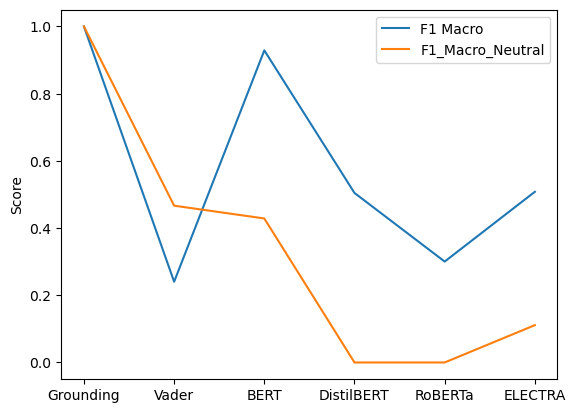

In [78]:
ax = sns.lineplot(data=Model_Score.loc['F1_Macro'], label='F1 Macro')
ax.set_ylabel ('Score', fontsize = 10)
ax = sns.lineplot(data=Model_Score.loc['F1_Macro_Neutral_Score'], label='F1_Macro_Neutral')

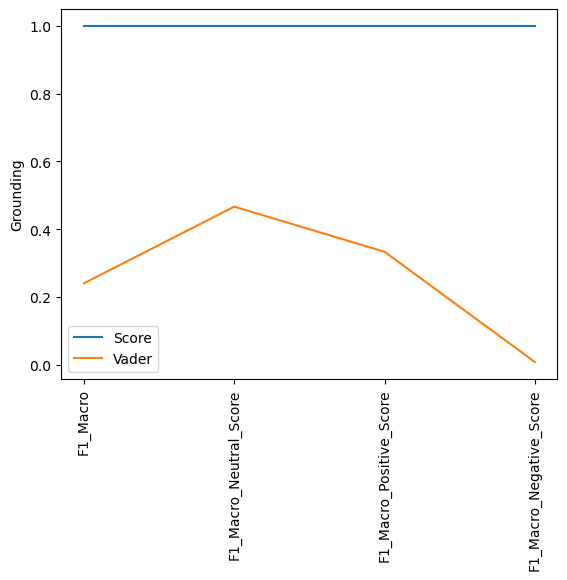

In [79]:
plt.xticks(rotation=90)
ax = sns.lineplot(data=Model_Score['Grounding'], label='Score')
ax = sns.lineplot(data=Model_Score['Vader'], label='Vader')

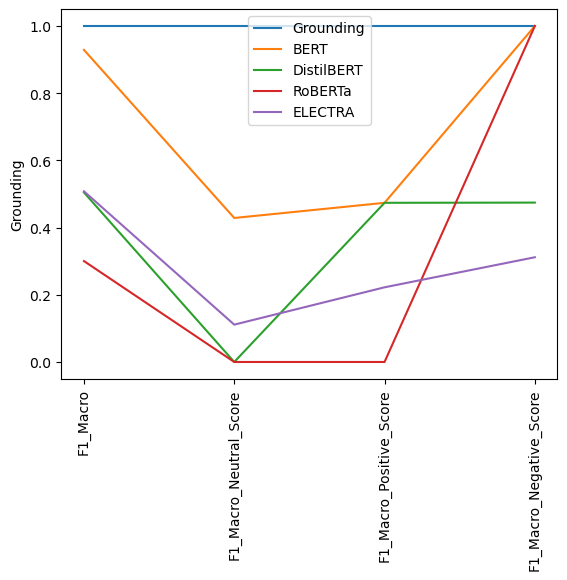

In [80]:
plt.xticks(rotation=90)
ax = sns.lineplot(data=Model_Score['Grounding'], label='Grounding')
# ax = sns.lineplot(data=Model_Score['Vader'], label='Vader')
ax = sns.lineplot(data=Model_Score['BERT'], label='BERT')
ax = sns.lineplot(data=Model_Score['DistilBERT'], label='DistilBERT')
ax = sns.lineplot(data=Model_Score['RoBERTa'], label='RoBERTa')
ax = sns.lineplot(data=Model_Score['ELECTRA'], label='ELECTRA')

### Neutral Counts

In [81]:
metricset

,sentiment,text,BERT,ELECTRA,Vader,DistilBERT,RoBERTa
0,negative,@united On top of that I paid for 1st class and my wife got stuck in coach.,negative,negative,neutral,negative,negative
1,negative,@united Ph the pat answers are BS. After I was denied boarding it sat at the gate until 9:05! Your employees totally suck.,negative,negative,neutral,negative,negative
2,negative,"@United Over the last week, United has provided me with the worst customer service experience of my life. Disgusting. #united",negative,positive,neutral,negative,negative
3,negative,@united 24 hrs since flight landed and ZERO info on my missing bag? rough ETA would be hugely helpful + restore some confidence,negative,negative,neutral,negative,negative
4,negative,@united big surprise #nogate waiting for our plane. Same fucken issues everything I fly you. #fail #worstairlineever,negative,negative,neutral,negative,negative
...,...,...,...,...,...,...,...
95,negative,@united You're trying to solve problem of your own making. Charging for checked luggage forces checking at gate. Brilliant.,negative,negative,neutral,positive,negative
96,negative,@united we've been waiting 45 min for a gate at SFO... Yet so many of them are free. Your excellence in operational efficiency is showing,negative,negative,neutral,positive,negative
97,negative,"@United ""delayed due to customer service"" Huh? http://t.co/XlTV5z6sT1",negative,neutral,neutral,negative,negative
98,negative,@united what about the poor customer service at checkin at Kansas KCI?!? That's it???,negative,negative,neutral,negative,negative


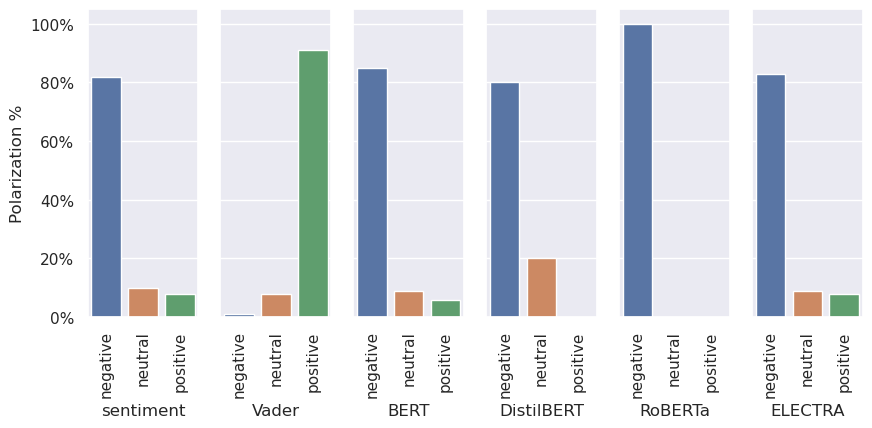

In [82]:
import matplotlib.pylab as plt 
sns.set(rc={"figure.figsize":(10, 4)})
f, (ax1, ax2,ax3,ax4,ax5,ax6) = plt.subplots(1, 6, sharey=True)
# ax1.set_ylabel ('Support', fontsize = 10)
ax2.set_ylabel ('Polarization %', fontsize = 10)
subplot1 = sns.countplot(metricset.sentiment, label='Support',ax=ax1,order = metricset['sentiment'].value_counts().index)
subplot2 = sns.countplot(metricset.Vader, label='Support',ax=ax2,order = metricset['sentiment'].value_counts().index)
subplot3 = sns.countplot(metricset.BERT, label='Support',ax=ax3,order = metricset['sentiment'].value_counts().index)
subplot4 = sns.countplot(metricset.DistilBERT, label='Support',ax=ax4,order = metricset['sentiment'].value_counts().index)
subplot5 = sns.countplot(metricset.RoBERTa, label='Support',ax=ax5,order = metricset['sentiment'].value_counts().index)
subplot6 = sns.countplot(metricset.ELECTRA, label='Support',ax=ax6,order = metricset['sentiment'].value_counts().index)
subplot1.set_xticklabels(labels=["negative", "neutral", "positive"],rotation=90)
subplot2.set_xticklabels(labels=["negative", "neutral", "positive"],rotation=90)
subplot3.set_xticklabels(labels=["negative", "neutral", "positive"],rotation=90)
subplot4.set_xticklabels(labels=["negative", "neutral", "positive"],rotation=90)
subplot5.set_xticklabels(labels=["negative", "neutral", "positive"],rotation=90)
subplot6.set_xticklabels(labels=["negative", "neutral", "positive"],rotation=90)
ax2.set_ylabel ('', fontsize = 10)
ax3.set_ylabel ('', fontsize = 10)
ax4.set_ylabel ('', fontsize = 10)
ax5.set_ylabel ('', fontsize = 10)
ax6.set_ylabel ('', fontsize = 10)
# ax4.set_ylabel ('Support', fontsize = 10)
ax1.set_ylabel ('Polarization %', fontsize = 12)

vals = ax1.get_yticks()
# print(vals)
# ax1.set_yticklabels(['{:,%}'.format(x/17) for x in vals])
# ax1.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
plt.gca().set_yticklabels(['{:.0f}%'.format(100*x/vals[-2]) for x in plt.gca().get_yticks()]) 
plt.show()

In [83]:
Polarity_Tabulation = pd.DataFrame(
    {'sentiment': ["0.0","0.0","0.0"],
     'Vader': ["0.0","0.0","0.0"],
     'BERT': ["0.0","0.0","0.0",],
     'DistilBERT': ["0.0","0.0","0.0",],
     'RoBERTa': ["0.0","0.0","0.0",],
     'ELECTRA': ["0.0","0.0","0.0",]
    },
    index=['negative(%)', 'neutral(%)','positive(%)']
)
Polarity_Tabulation = Polarity_Tabulation.astype(np.float64)

In [84]:
# metricset

In [85]:
per_df = metricset
percentage_table = per_df

In [86]:
Percentage_Tabulation = pd.DataFrame(
    {'sentiment': ["0.0","0.0","0.0"],
     'Vader': ["0.0","0.0","0.0"],
     'BERT': ["0.0","0.0","0.0",],
     'DistilBERT': ["0.0","0.0","0.0",],
     'RoBERTa': ["0.0","0.0","0.0",],
     'ELECTRA': ["0.0","0.0","0.0",]
    },
    index=['negative(%)', 'neutral(%)','positive(%)']
)
Percentage_Tabulation = Percentage_Tabulation.astype(np.float64)

In [87]:
Percentage_Tabulation

,sentiment,Vader,BERT,DistilBERT,RoBERTa,ELECTRA
negative(%),0.0,0.0,0.0,0.0,0.0,0.0
neutral(%),0.0,0.0,0.0,0.0,0.0,0.0
positive(%),0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
per_df

,sentiment,text,BERT,ELECTRA,Vader,DistilBERT,RoBERTa
0,negative,@united On top of that I paid for 1st class and my wife got stuck in coach.,negative,negative,neutral,negative,negative
1,negative,@united Ph the pat answers are BS. After I was denied boarding it sat at the gate until 9:05! Your employees totally suck.,negative,negative,neutral,negative,negative
2,negative,"@United Over the last week, United has provided me with the worst customer service experience of my life. Disgusting. #united",negative,positive,neutral,negative,negative
3,negative,@united 24 hrs since flight landed and ZERO info on my missing bag? rough ETA would be hugely helpful + restore some confidence,negative,negative,neutral,negative,negative
4,negative,@united big surprise #nogate waiting for our plane. Same fucken issues everything I fly you. #fail #worstairlineever,negative,negative,neutral,negative,negative
...,...,...,...,...,...,...,...
95,negative,@united You're trying to solve problem of your own making. Charging for checked luggage forces checking at gate. Brilliant.,negative,negative,neutral,positive,negative
96,negative,@united we've been waiting 45 min for a gate at SFO... Yet so many of them are free. Your excellence in operational efficiency is showing,negative,negative,neutral,positive,negative
97,negative,"@United ""delayed due to customer service"" Huh? http://t.co/XlTV5z6sT1",negative,neutral,neutral,negative,negative
98,negative,@united what about the poor customer service at checkin at Kansas KCI?!? That's it???,negative,negative,neutral,negative,negative


In [89]:
# # label = "DistilBERT"
label = "sentiment"

In [90]:
# percentage_table = metricset[label].value_counts()/metricset[label].count()

In [91]:
percentage_table = per_df[label].value_counts()/metricset[label].count()

In [92]:
percentage_table

negative    0.82
positive    0.10
neutral     0.08
Name: sentiment, dtype: float64

In [93]:
# sentiment= sentiment+"(%)"

In [94]:
def func_tabulate(per_df, label, sentiment):
    try :
        sentiment_tag = sentiment+"(%)"
        percentage_table = per_df[label].value_counts()/metricset[label].count()
        Percentage_Tabulation[label].loc[sentiment_tag] = round(percentage_table.loc[sentiment],2)*100
    except Exception:
        pass
    return 

In [95]:
round(percentage_table.loc["negative"],2)*100

82.0

In [96]:
func_tabulate(percentage_table, label="sentiment", sentiment="negative")
func_tabulate(percentage_table, label="sentiment", sentiment="neutral")
func_tabulate(percentage_table, label="sentiment", sentiment="positive")
func_tabulate(percentage_table, label="Vader", sentiment="negative")
func_tabulate(percentage_table, label="Vader", sentiment="neutral")
func_tabulate(percentage_table, label="Vader", sentiment="positive")
func_tabulate(percentage_table, label="BERT", sentiment="negative")
func_tabulate(percentage_table, label="BERT", sentiment="neutral")
func_tabulate(percentage_table, label="BERT", sentiment="positive")
func_tabulate(percentage_table, label="DistilBERT", sentiment="negative")
func_tabulate(percentage_table, label="DistilBERT", sentiment="neutral")
func_tabulate(percentage_table, label="DistilBERT", sentiment="positive")
func_tabulate(percentage_table, label="RoBERTa", sentiment="negative")
func_tabulate(percentage_table, label="RoBERTa", sentiment="neutral")
func_tabulate(percentage_table, label="RoBERTa", sentiment="positive")
func_tabulate(percentage_table, label="ELECTRA", sentiment="negative")
func_tabulate(percentage_table, label="ELECTRA", sentiment="neutral")
func_tabulate(percentage_table, label="ELECTRA", sentiment="positive")

In [97]:
Percentage_Tabulation

,sentiment,Vader,BERT,DistilBERT,RoBERTa,ELECTRA
negative(%),0.0,0.0,0.0,0.0,0.0,0.0
neutral(%),0.0,0.0,0.0,0.0,0.0,0.0
positive(%),0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
# try :
#     Percentage_Tabulation[label].loc['neutral(%)'] = round(percentage_table.loc['neutral'],2)*100
# except Exception:
#     pass

In [99]:
# try :
#     Percentage_Tabulation[label].loc['positive(%)'] = round(percentage_table.loc['positive'],2)*100
# except Exception:
#     pass

In [100]:
percentage_table

negative    0.82
positive    0.10
neutral     0.08
Name: sentiment, dtype: float64

In [101]:
percentage_table/2

negative    0.41
positive    0.05
neutral     0.04
Name: sentiment, dtype: float64

In [102]:
# round(percentage_table[label],2)

In [103]:
# percentage_table[label] = round(percentage_table[label],2)
# percentage_table[label]

In [104]:
percentage_table['negative']=0.0
percentage_table['neutral']=0.0
percentage_table['positive']=0.0

In [105]:
per_df[label].value_counts()/metricset[label].count()

negative    0.82
positive    0.10
neutral     0.08
Name: sentiment, dtype: float64

In [106]:
def percentage_df(df,label):
#     print(per_df)
#     print(label)
    per_table = pd.DataFrame()
#     per_table['negative']=0
#     per_table['neutral']=0
#     per_table['positive']=0
    try:
        if label in df.columns:
#             print(label)
            per_table = df[label].value_counts()/metricset[label].count()
            per_table[label] = round(per_table,2)*100
#             temp =  per_table[label]
            if "neutral" not in per_table.index:
#                 print("neutral does not exist")
                per_table[label]['neutral']=0
#                 print (per_table)
            elif "positive" not in per_table.index:
#                 print("positive does not exist")
                per_table[label]['positive']=0
            elif "negative" not in per_table.index:
#                 print("negative does not exist")
                per_table[label]['negative']=0
            else:
                pass
            
#             print(per_table)
        else:
            pass
        
#         print(per_table[label])
        return per_table[label]  
    except Exception:     
        pass   

In [107]:
percentage_df(per_df,"DistilBERT")

negative    80.0
positive    20.0
neutral      0.0
Name: DistilBERT, dtype: float64

In [108]:
a1 = per_df['DistilBERT'].value_counts()

In [109]:
if "neutral1" not in a1.index:
    print("neutral1 does not exist")

neutral1 does not exist


In [110]:
a1['neutral']=0

In [111]:
a1

negative    80
positive    20
neutral      0
Name: DistilBERT, dtype: int64

In [112]:
ddf= percentage_df(per_df,"sentiment")

In [113]:
ddf

negative    82.0
positive    10.0
neutral      8.0
Name: sentiment, dtype: float64

In [114]:
try:
    Polarity_Tabulation['sentiment'].loc['negative(%)'] = percentage_df(per_df,"sentiment").loc['negative']
    Polarity_Tabulation['sentiment'].loc['neutral(%)'] = percentage_df(per_df,"sentiment").loc['neutral']
    Polarity_Tabulation['sentiment'].loc['positive(%)'] = percentage_df(per_df,"sentiment").loc['positive']
except Exception:
    pass

In [115]:
Polarity_Tabulation

,sentiment,Vader,BERT,DistilBERT,RoBERTa,ELECTRA
negative(%),82.0,0.0,0.0,0.0,0.0,0.0
neutral(%),8.0,0.0,0.0,0.0,0.0,0.0
positive(%),10.0,0.0,0.0,0.0,0.0,0.0


In [116]:
try:
    Polarity_Tabulation['Vader'].loc['negative(%)'] = percentage_df(per_df,"Vader").loc['negative']
    Polarity_Tabulation['Vader'].loc['neutral(%)'] = percentage_df(per_df,"Vader").loc['neutral']
    Polarity_Tabulation['Vader'].loc['positive(%)'] = percentage_df(per_df,"Vader").loc['positive']
except Exception:
    pass

In [117]:
Polarity_Tabulation

,sentiment,Vader,BERT,DistilBERT,RoBERTa,ELECTRA
negative(%),82.0,1.0,0.0,0.0,0.0,0.0
neutral(%),8.0,91.0,0.0,0.0,0.0,0.0
positive(%),10.0,8.0,0.0,0.0,0.0,0.0


In [118]:
try:
    Polarity_Tabulation['BERT'].loc['negative(%)'] = percentage_df(per_df,"BERT").loc['negative']
    Polarity_Tabulation['BERT'].loc['neutral(%)'] = percentage_df(per_df,"BERT").loc['neutral']
    Polarity_Tabulation['BERT'].loc['positive(%)'] = percentage_df(per_df,"BERT").loc['positive']

except Exception:
    pass

In [119]:
percentage_df(per_df,"BERT").loc['negative']

85.0

In [120]:
Polarity_Tabulation

,sentiment,Vader,BERT,DistilBERT,RoBERTa,ELECTRA
negative(%),82.0,1.0,85.0,0.0,0.0,0.0
neutral(%),8.0,91.0,6.0,0.0,0.0,0.0
positive(%),10.0,8.0,9.0,0.0,0.0,0.0


In [121]:
try:
    Polarity_Tabulation['DistilBERT'].loc['negative(%)'] = percentage_df(per_df,"DistilBERT").loc['negative']
    Polarity_Tabulation['DistilBERT'].loc['neutral(%)'] = percentage_df(per_df,"DistilBERT").loc['neutral']
    Polarity_Tabulation['DistilBERT'].loc['positive(%)'] = percentage_df(per_df,"DistilBERT").loc['positive']
except Exception:
    pass

In [122]:
Polarity_Tabulation['DistilBERT'].loc['neutral(%)'] = percentage_df(per_df,"DistilBERT").loc['neutral']

In [123]:
Polarity_Tabulation.rename(columns = {'sentiment':'Grounding'}, inplace = True)
Polarity_Tabulation

,Grounding,Vader,BERT,DistilBERT,RoBERTa,ELECTRA
negative(%),82.0,1.0,85.0,80.0,0.0,0.0
neutral(%),8.0,91.0,6.0,0.0,0.0,0.0
positive(%),10.0,8.0,9.0,20.0,0.0,0.0


In [124]:
try:
    Polarity_Tabulation['RoBERTa'].loc['negative(%)'] = percentage_df(per_df,"RoBERTa").loc['negative']
    Polarity_Tabulation['RoBERTa'].loc['neutral(%)'] = percentage_df(per_df,"RoBERTa").loc['neutral']
    Polarity_Tabulation['RoBERTa'].loc['positive(%)'] = percentage_df(per_df,"RoBERTa").loc['positive']
    
except Exception:
    pass

In [125]:
Polarity_Tabulation

,Grounding,Vader,BERT,DistilBERT,RoBERTa,ELECTRA
negative(%),82.0,1.0,85.0,80.0,100.0,0.0
neutral(%),8.0,91.0,6.0,0.0,0.0,0.0
positive(%),10.0,8.0,9.0,20.0,0.0,0.0


In [126]:
try:
    Polarity_Tabulation['ELECTRA'].loc['negative(%)'] = percentage_df(per_df,"ELECTRA").loc['negative']
    Polarity_Tabulation['ELECTRA'].loc['neutral(%)'] = percentage_df(per_df,"ELECTRA").loc['neutral']
    Polarity_Tabulation['ELECTRA'].loc['positive(%)'] = percentage_df(per_df,"ELECTRA").loc['positive']
    
except Exception:
    pass

In [127]:
Polarity_Tabulation

,Grounding,Vader,BERT,DistilBERT,RoBERTa,ELECTRA
negative(%),82.0,1.0,85.0,80.0,100.0,83.0
neutral(%),8.0,91.0,6.0,0.0,0.0,8.0
positive(%),10.0,8.0,9.0,20.0,0.0,9.0


In [128]:
percentage_df(per_df,"Vader")

neutral     91.0
positive     8.0
negative     1.0
Name: Vader, dtype: float64

In [129]:
BERT_Polarity = percentage_df(per_df,"BERT")

In [130]:
BERT_Polarity

negative    85.0
positive     9.0
neutral      6.0
Name: BERT, dtype: float64

In [131]:
# percentage_table = percentage_df['Grounding'].value_counts()/metricset['Grounding'].count()
# percentage_table['Grounding_percentage'] = round(percentage_table,2)*100
# percentage_table['Grounding_percentage']

In [132]:
# f, (ax4, ax5) = plt.subplots(1, 2, sharey=True)
# ax4.set_ylabel ('Support', fontsize = 10)
# ax5.set_ylabel ('Polarization Count', fontsize = 10)
# subplot1 = sns.countplot(metricset.DistilBERT, label='Support',ax=ax4,order = metricset['Grounding'].value_counts().index)
# subplot2 = sns.countplot(metricset.ELECTRA, label='Support',ax=ax5,order = metricset['Grounding'].value_counts().index)
# subplot1.set_xticklabels(labels=["negative", "neutral", "positive"],rotation=30)
# subplot2.set_xticklabels(labels=["negative", "neutral", "positive"],rotation=30)
# plt.show()

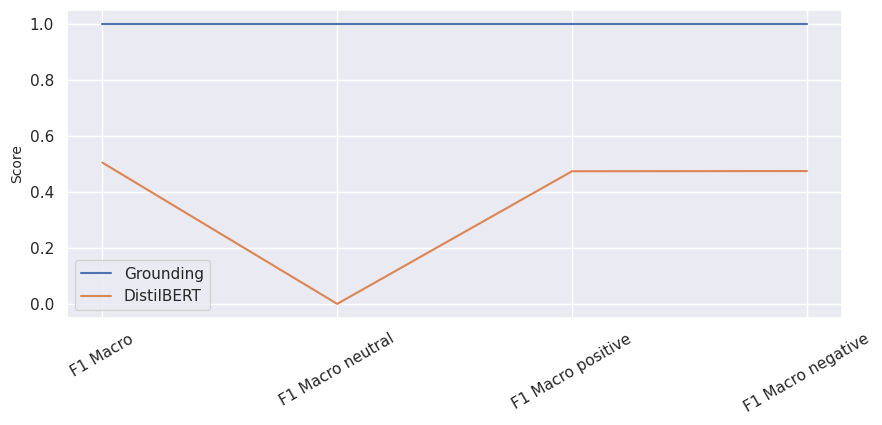

In [133]:
# plt.xticks(rotation=90)
ax = sns.lineplot(data=Model_Score['Grounding'], label='Grounding')
ax.set_ylabel ('Score', fontsize = 10)
ax.set_xticklabels(labels=["F1 Macro", "F1 Macro neutral", "F1 Macro positive", "F1 Macro negative"],rotation=30)
ax = sns.lineplot(data=Model_Score['DistilBERT'], label='DistilBERT')


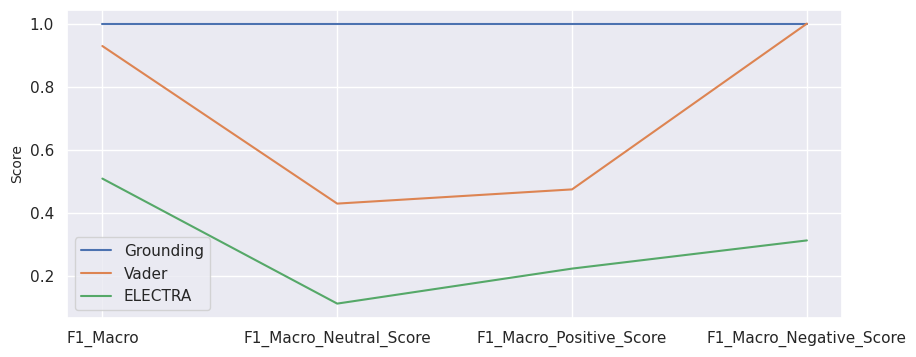

In [134]:
# plt.xticks(rotation=90)
sns.lineplot(data=Model_Score['Grounding'], label='Grounding')
ax.set_ylabel ('Score', fontsize = 10)
ax.set_xticklabels(labels=["F1 Macro", "F1 Macro neutral", "F1 Macro positive", "F1 Macro negative"],rotation=30)
ax = sns.lineplot(data=Model_Score['BERT'], label='Vader')
ax.set_ylabel ('Score', fontsize = 10)
ax = sns.lineplot(data=Model_Score['ELECTRA'], label='ELECTRA')


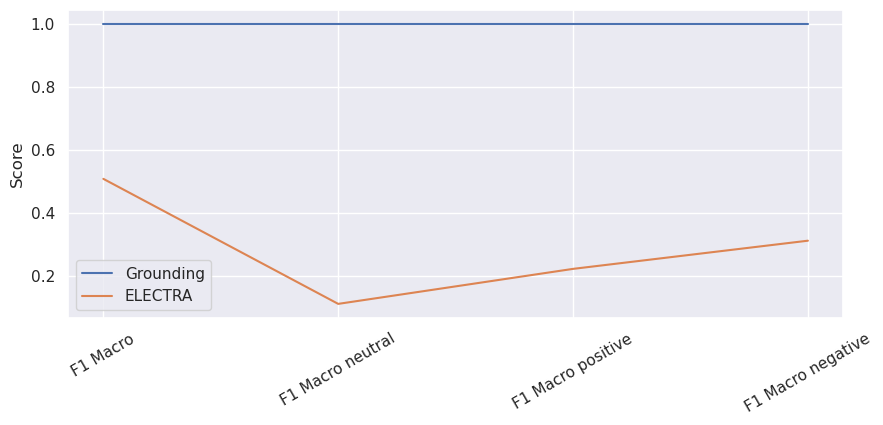

In [135]:
# plt.xticks(rotation=90)
sns.set(font_scale=1)
ax = sns.lineplot(data=Model_Score['Grounding'], label='Grounding')
ax.set_ylabel ('Score', fontsize = 12)

ax.set_xticklabels(labels=["F1 Macro", "F1 Macro neutral", "F1 Macro positive", "F1 Macro negative"],rotation=30)
ax = sns.lineplot(data=Model_Score['ELECTRA'], label='ELECTRA')


In [136]:
Model_Score

,Grounding,Vader,BERT,DistilBERT,RoBERTa,ELECTRA
F1_Macro,1.0,0.240355,0.928849,0.504527,0.300366,0.508014
F1_Macro_Neutral_Score,1.0,0.466667,0.428571,0.000000,0.000000,0.111111
F1_Macro_Positive_Score,1.0,0.333333,0.473684,0.473684,0.000000,0.222222
F1_Macro_Negative_Score,1.0,0.008032,1.000000,0.474359,1.000000,0.311688


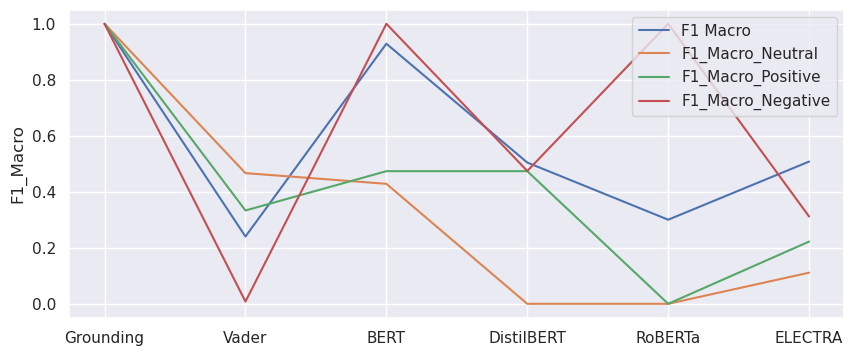

In [137]:
plt = sns.lineplot(data=Model_Score.loc['F1_Macro'], label='F1 Macro')
plt = sns.lineplot(data=Model_Score.loc['F1_Macro_Neutral_Score'], label='F1_Macro_Neutral')
plt = sns.lineplot(data=Model_Score.loc['F1_Macro_Positive_Score'],label='F1_Macro_Positive')
plt = sns.lineplot(data=Model_Score.loc['F1_Macro_Negative_Score'],label='F1_Macro_Negative')

## Business Rule

In [138]:
# If positive : Print "you are happy with our service"
#                  Retweet (Customer Campaign)
# if negative : Print "i'm sorry you feel this way"
#                    Direct_Message (Customer Service_Ticket)
# if neutral : Print "" exit

In [139]:
customer_tweet = "My flight is delayed, I need a good explanation"

In [140]:
score=sa.polarity_scores(customer_tweet)
print(score)

{'neg': 0.161, 'neu': 0.593, 'pos': 0.246, 'compound': 0.25}


In [141]:
# summary_text = summarizer(customer_tweet, max_length=50, min_length=20)

In [142]:
# tweet_summary = str(summary_text[0]).split("\"")[1]
# print(tweet_summary)

In [143]:
# score=sa.polarity_scores(tweet_summary)
# print(score.get('neg'))
# print(score.get('neu'))

In [144]:
score_1=sa.polarity_scores(customer_tweet)
idx_customer_tweet = np.argmax([score_1.get('neg'),score_1.get('neu'),score_1.get('pos')],0)

In [145]:
# score_2=sa.polarity_scores(tweet_summary)
# idx_tweet_summary = np.argmax([score_2.get('neg'),score_2.get('neu'),score_2.get('pos')],0)

## Sentiment Contradictions & Differentiated Response 

In [146]:
print(Customer_Service_Business_Rule(customer_tweet,idx_customer_tweet))

Customer Tweet:  My flight is delayed, I need a good explanation
Bot:(Neutral Sentiment)  --no response--


In [147]:
# print(Customer_Service_Business_Rule_Transformer(tweet_summary,idx_tweet_summary))

In [148]:
customer_tweet = "My flight is delayed, what the fcuk"

In [149]:
# from transformers import pipeline

In [150]:
model_name

'siebert/sentiment-roberta-large-english'

In [151]:
# summarizer = pipeline("sentiment-analysis", model=model_name)
# sentiment_dict = summarizer(customer_tweet, max_length=50, min_length=20)

In [ ]:
from transformers import pipeline
sentiment_analysis = pipeline("sentiment-analysis",model="siebert/sentiment-roberta-large-english")
print(sentiment_analysis("I love this!"))

In [ ]:
sentiment_dict=sentiment_analysis

In [ ]:
score_3=sa.polarity_scores(customer_tweet)
idx_customer_tweet = np.argmax([score_3.get('neg'),score_3.get('neu'),score_3.get('pos')],0)

In [ ]:
score_3

In [ ]:
idx_customer_tweet

In [ ]:
# score_4=sa.polarity_scores(summary_text)
# idx_tweet_summary = np.argmax([score_4.get('neg'),score_4.get('neu'),score_4.get('pos')],0)

In [ ]:
print(Customer_Service_Business_Rule(customer_tweet,idx_customer_tweet))

In [ ]:
# print(Customer_Service_Business_Rule_Transformer(tweet_summary,idx_tweet_summary))

In [ ]:
text=TextBlob(customer_tweet) # neutral
print(text.sentiment)

In [ ]:
score=sa.polarity_scores(customer_tweet)
print(score)

In [ ]:
# score=sa.polarity_scores(tweet_summary)
# print(score.get('neu'))
# print(score.get('neg'))